# Import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
pollution = pd.read_csv('pollution_wide.csv')
pollution.head()

city  year  month  day     CO   NO2     O3    SO2
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05

# Hardcoding a highlight

In [3]:
houston_pollution = pollution[pollution.city  ==  'Houston']
houston_pollution.head()

city  year  month  day       CO    NO2      O3     SO2
3700  Houston  2012      1    1  0.25000  19.10  0.0300   0.100
3701  Houston  2012      1    2  0.50000  39.50  0.0310   0.850
3702  Houston  2012      1    3  0.48000  34.65  0.0365   8.225
3703  Houston  2012      1    4  0.91550  49.75  0.0260   5.375
3704  Houston  2012      1    5  0.70825  48.15  0.0250  15.050

In [4]:
# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

In [5]:
houston_colors[:5]

['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

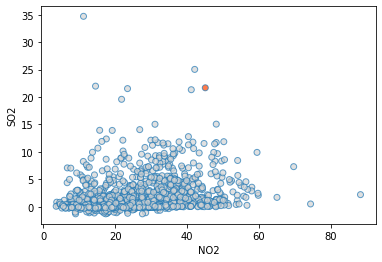

In [6]:
sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

# Programmatically creating a highlight

In [7]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

In [8]:
# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

In [9]:
# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]
houston_pollution[houston_pollution['point_type'] == 'Highest O3 Day']

city  year  month  day       CO   NO2     O3    SO2      point_type
3877  Houston  2012      6  178  0.68425  46.9  0.108  9.025  Highest O3 Day

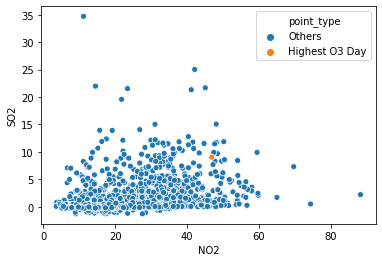

In [31]:
# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

# Comparing with two KDEs

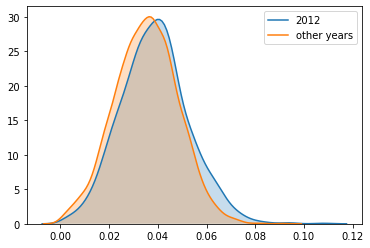

In [33]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label           
            shade = True,
            label = 'other years')
plt.show()

# Improving your KDEs

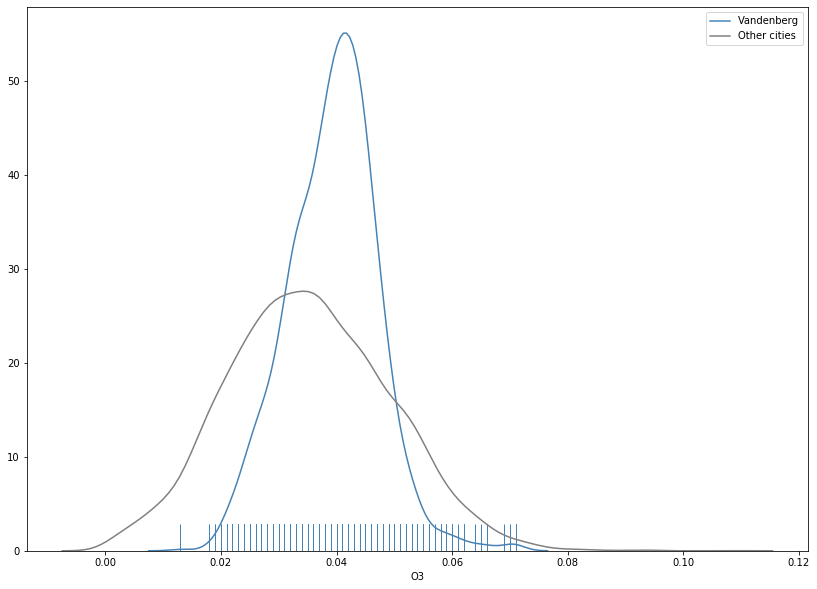

In [35]:
plt.figure(figsize=(14, 10))
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg',
                # Turn of the histogram and color blue to stand out
               hist = False, 
             color = 'steelblue',  
               # Turn on rugplot
               rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
             label = 'Other cities',
               # Turn off histogram and color gray
               hist = False,
             color = 'gray')
plt.show()

# Beeswarms

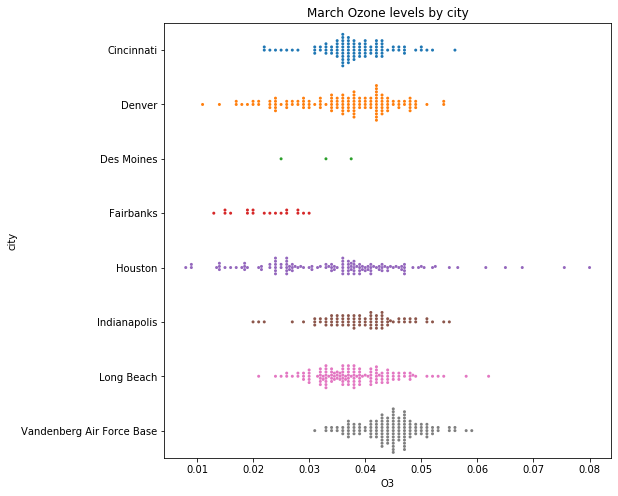

In [39]:
plt.figure(figsize=(8, 8))
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = "O3", 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

# A basic text annotation

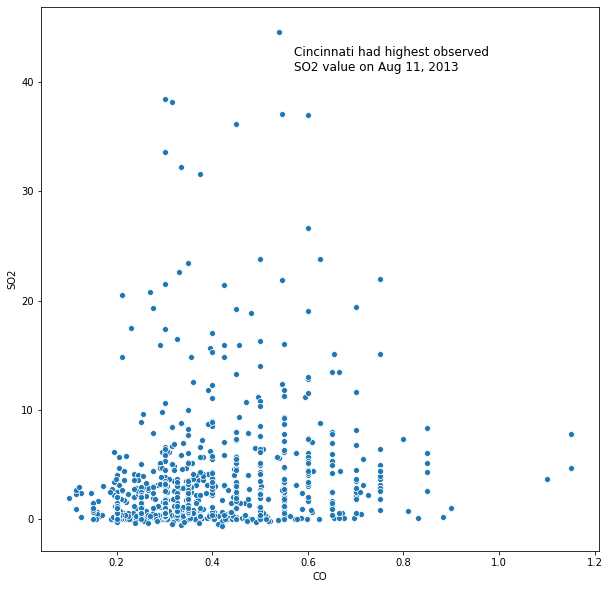

In [43]:
plt.figure(figsize=(10, 10))

# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})

plt.show()

# Arrow annotations


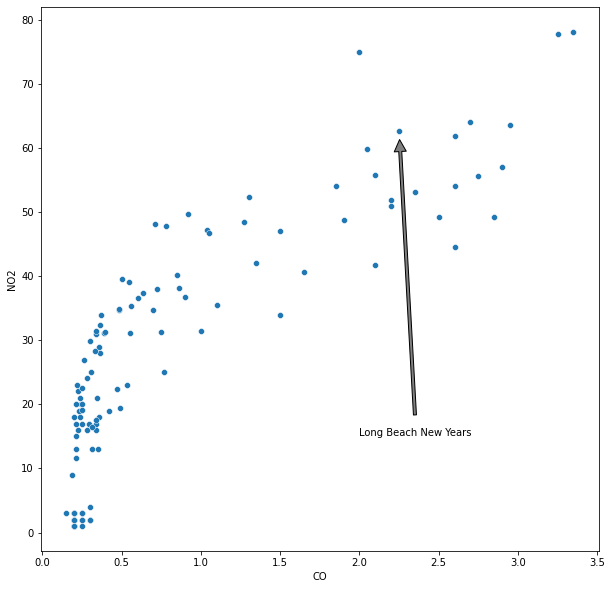

In [42]:
plt.figure(figsize=(10, 10))
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

# Combining annotations and color

In [45]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

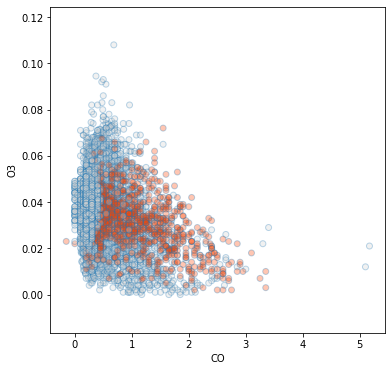

In [47]:
plt.figure(figsize=(6, 6))

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})
plt.show() 

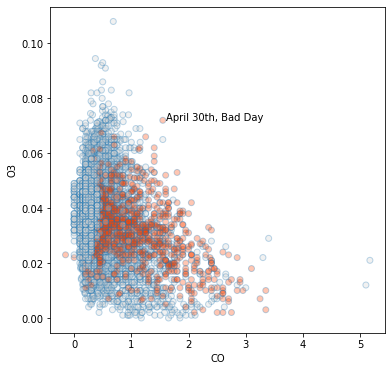

In [47]:
plt.figure(figsize=(6, 6))

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

# Getting rid of unnecessary color

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


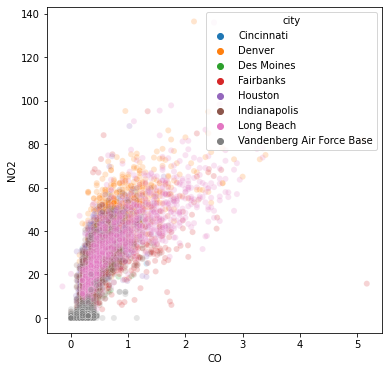

In [49]:
plt.figure(figsize=(6, 6))
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)

<Figure size 432x432 with 0 Axes>

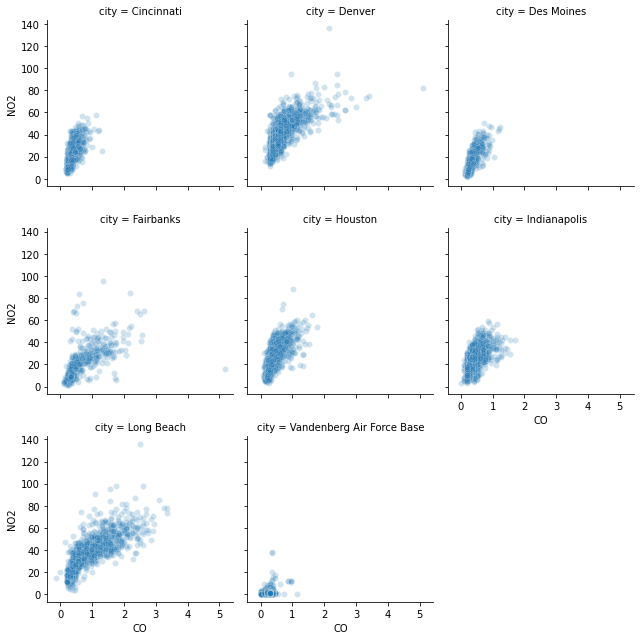

In [50]:
plt.figure(figsize=(6, 6))
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot,'CO', 'NO2', alpha = 0.2)
plt.show()

# Fixing Seaborn's bar charts

<img src='bars_no_border.png'>

In [51]:
import numpy as np

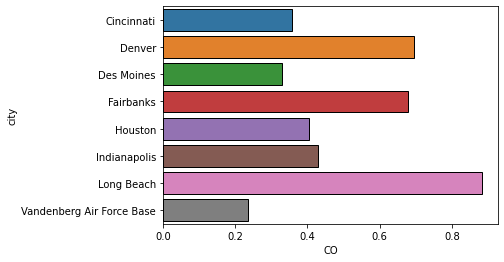

In [52]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
              edgecolor = 'black')
plt.show()

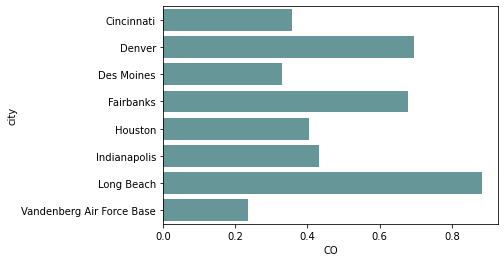

In [53]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue')
plt.show()

# Making a custom continuous palette

In [54]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

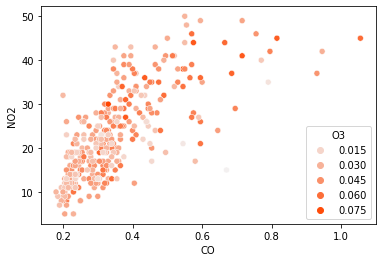

In [55]:
# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                                  as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

# Customizing a diverging palette heatmap

In [95]:
# Filter the data
feb_2015_CO = pollution.query("year  ==  2015 & month == 2")
feb_2015_CO = feb_2015_CO[['city', 'day', 'CO']]
feb_2015_CO.head()

city  day      CO
767  Cincinnati   32  0.3425
768  Cincinnati   33  0.2560
769  Cincinnati   34  0.2485
770  Cincinnati   35  0.3140
771  Cincinnati   36  0.3570

In [96]:
# Pivotting
feb_2015_CO = feb_2015_CO.pivot(values='CO', columns='day', index='city')
feb_2015_CO.head()

day               32     33      34      35      36      37      38      39  \
city                                                                          
Cincinnati    0.3425  0.256  0.2485  0.3140  0.3570  0.4095  0.3835  0.2275   
Denver        0.6500  1.400  0.7500  0.5500  0.9000  1.7500  0.6000  0.5000   
Fairbanks        NaN    NaN     NaN     NaN  2.6250  1.7100  1.6700  1.3900   
Houston       0.2305  0.314  0.4075  0.3945  0.3255  0.5880  1.3200  0.3080   
Indianapolis  0.3500  0.200  0.2500  0.3000  0.4500  0.4000  0.3000  0.3000   

day               40      41  ...      50      51     52      53     54  \
city                          ...                                         
Cincinnati    0.3245  0.3185  ...  0.3055  0.5795  0.460  0.3765  0.304   
Denver        1.0000  1.2500  ...  1.3000  0.8500  0.350  0.2500  0.750   
Fairbanks     2.4950  1.0100  ...  2.5550  2.4100  2.150  1.3200  0.735   
Houston       0.5260  0.5260  ...  0.4615  0.3200  0.225  0.2165  0.226   
Indianapolis  0.3000  0.3000  ...  0.2000  0.6500  0.600  0.8500  0.550   

day              55     56      57     58      59  
city                                               
Cincinnati    0.439  0.327  0.2890  0.305  0.2910  
Denver        1.200  0.850  0.4500  0.550  0.9000  
Fairbanks     0.360  0.480  0.8050  1.055  0.7600  
Houston       0.321  0.345  0.4965  0.287  0.3025  
Indianapolis  0.650  0.550     NaN    NaN  0.5000  

[5 rows x 28 columns]

In [97]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

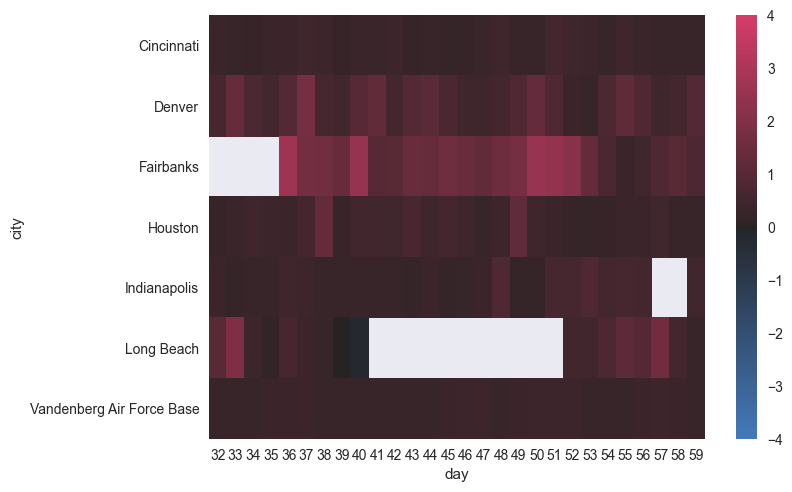

In [137]:
# plt.style.use("seaborn")
# Pass palette to plot and set axis ranges
sns.heatmap(feb_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

# Using a custom categorical palette

In [127]:
# Filter data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

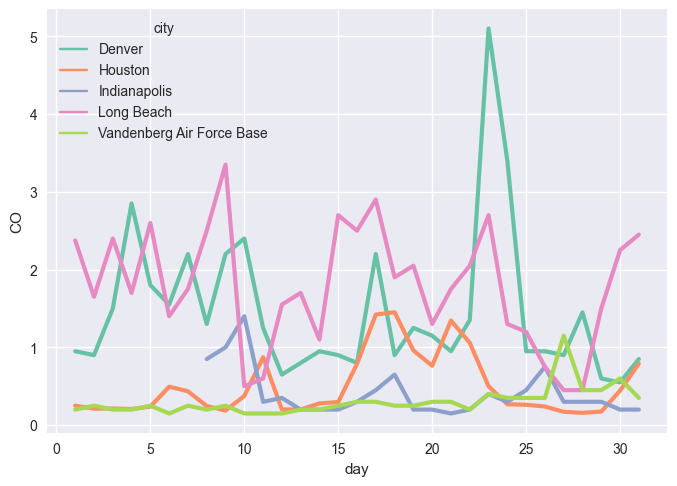

In [138]:
# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day",
             y = "CO",
             hue = "city",
             palette = "Set2",
             linewidth = 3,
             data = pollution_jan13)
plt.show()

# Dealing with too many categories

In [149]:
pollution_13 = pollution.query('year  ==  2013')
pollution_13.tail()

city  year  month  day    CO  NO2     O3   SO2
8182  Vandenberg Air Force Base  2013     12  361  0.25  5.0  0.044  2.50
8183  Vandenberg Air Force Base  2013     12  362  0.30  4.0  0.036  1.65
8184  Vandenberg Air Force Base  2013     12  363  0.30  7.0  0.046  1.80
8185  Vandenberg Air Force Base  2013     12  364  0.30  2.0  0.048  1.65
8186  Vandenberg Air Force Base  2013     12  365  0.25  2.0  0.046  1.50

In [156]:
# Choose the combos that get distinct colors
wanted_combos = ['Denver', 'Cincinnati']

In [157]:
# Assign a new column to DataFrame for isolating the desired combos
pollution_13['color_cats'] = [x if x in wanted_combos else 'other' for x in pollution_13['city']]
pollution_13.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


city  year  month  day     CO   NO2     O3    SO2  color_cats
58  Cincinnati  2013      2   43  0.320  35.0  0.027  11.20  Cincinnati
59  Cincinnati  2013      2   44  0.315  24.0  0.017  12.10  Cincinnati
60  Cincinnati  2013      2   45  0.285  21.0  0.029   6.25  Cincinnati
61  Cincinnati  2013      2   46  0.320  34.0  0.030  13.45  Cincinnati
62  Cincinnati  2013      2   47  0.340  32.0  0.033   1.90  Cincinnati

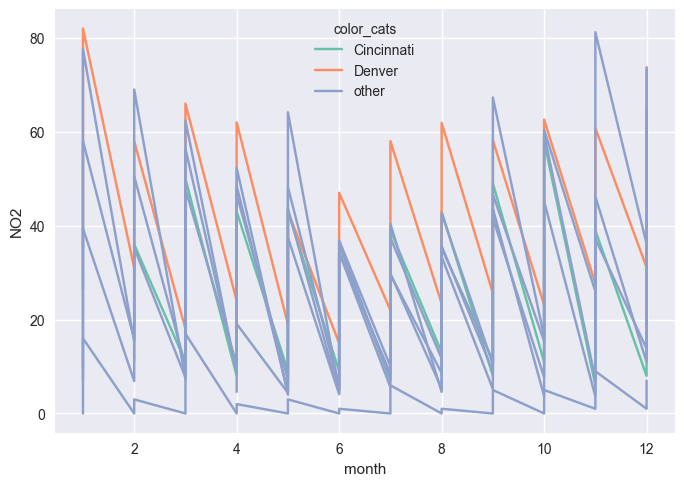

In [158]:
# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "NO2",
             hue = 'color_cats',
             units = 'city',
             estimator = None,
             palette = 'Set2',
             data = pollution_13)
plt.show()

# Coloring ordinal categories

In [159]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)
pollution.head()


city  year  month  day     CO   NO2     O3    SO2  CO quartile
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20            0
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35            0
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25            1
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15            1
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05            1

In [160]:
# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

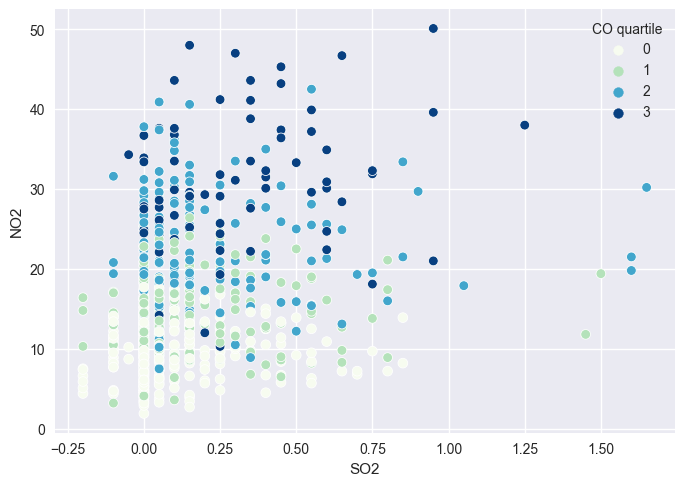

In [161]:
# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

# Choosing the right variable to encode with color

<img src='exercise_swap_color_encoding.png'>

In [175]:
pollution_max = pollution.groupby(['city', 'year']).agg({'CO':'max'}).reset_index()
pollution_max.head()

city  year     CO
0  Cincinnati  2012  1.195
1  Cincinnati  2013  1.320
2  Cincinnati  2014  1.055
3  Cincinnati  2015  1.008
4      Denver  2012  3.300

In [176]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          'Indianapolis', 'Des Moines', 'Cincinnati', 'Houston']

# Filter data to desired cities
city_maxes = pollution_max[pollution_max.city.isin(cities)]

city_maxes

city  year       CO
0                  Cincinnati  2012  1.19500
1                  Cincinnati  2013  1.32000
2                  Cincinnati  2014  1.05500
3                  Cincinnati  2015  1.00800
4                      Denver  2012  3.30000
5                      Denver  2013  5.10000
6                      Denver  2014  2.65000
7                      Denver  2015  2.45000
8                  Des Moines  2012  1.22550
9                  Des Moines  2013  0.80600
10                 Des Moines  2014  1.05500
11                 Des Moines  2015  0.89450
12                  Fairbanks  2014  2.23000
13                  Fairbanks  2015  5.17000
14                    Houston  2012  1.40825
15                    Houston  2013  1.78750
16                    Houston  2014  1.51875
17                    Houston  2015  1.32000
18               Indianapolis  2012  1.25000
19               Indianapolis  2013  1.55000
20               Indianapolis  2014  1.15000
21               Indianapolis  2015  1.70000
22                 Long Beach  2012  3.35000
23                 Long Beach  2013  3.35000
24                 Long Beach  2014  3.10000
25                 Long Beach  2015  2.75000
26  Vandenberg Air Force Base  2012  0.45000
27  Vandenberg Air Force Base  2013  1.15000
28  Vandenberg Air Force Base  2014  0.95000
29  Vandenberg Air Force Base  2015  0.40000

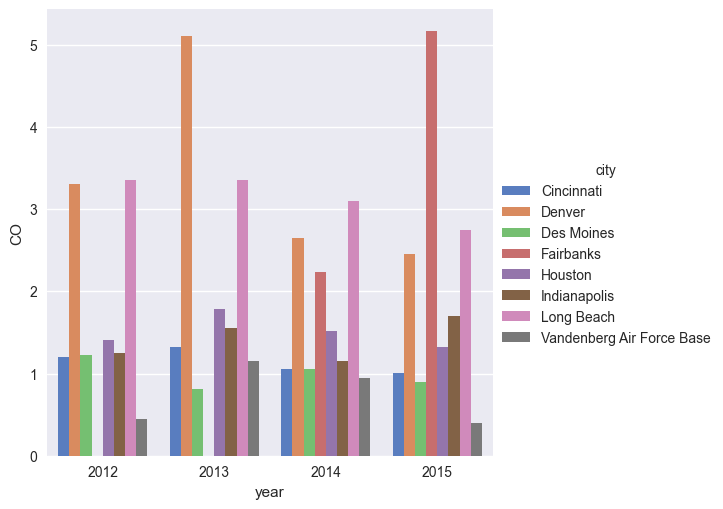

In [178]:
# Swap city and year encodings
sns.catplot(x = 'year', hue = 'city',
              y = 'CO',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'muted',
              sharey = False, kind = 'bar')
plt.show()

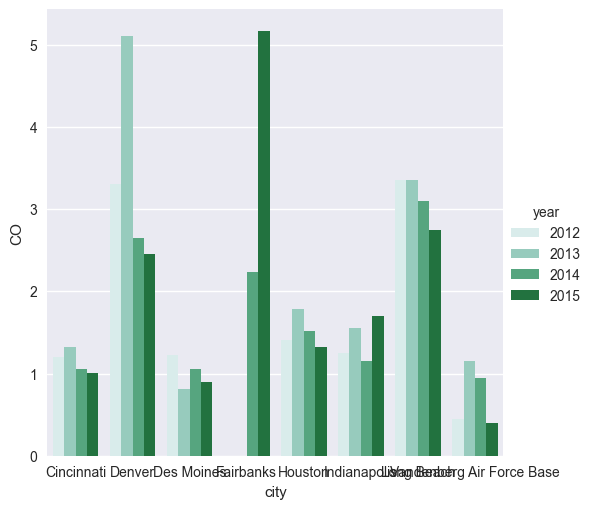

In [179]:
# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'CO',
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()

# Basic confidence intervals

In [181]:
average_ests = pd.read_csv('average_ests.csv')
average_ests

pollutant       mean   std_err             y   seen
0        CO   0.351911  0.033563  95% Interval   0.40
1       NO2  19.021429  2.200518  95% Interval  16.00
2        O3   0.043982  0.001822  95% Interval   0.05
3       SO2   0.207143  0.037518  95% Interval   0.15

In [182]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

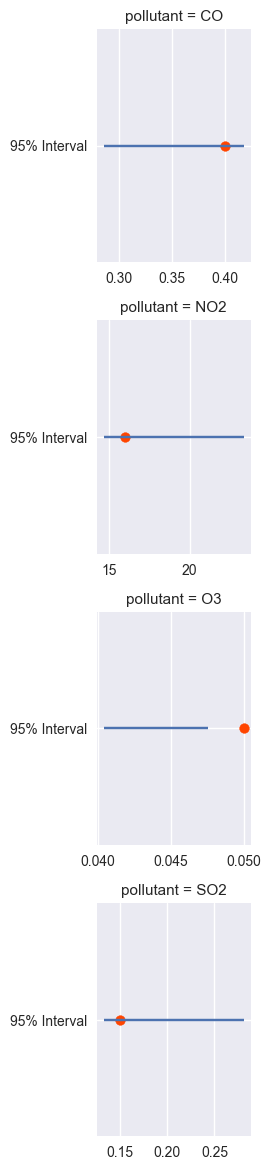

In [183]:
# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('')

plt.show()

# Annotating confidence intervals

In [185]:
diffs_by_year = pd.read_csv('diffs_by_year.csv')

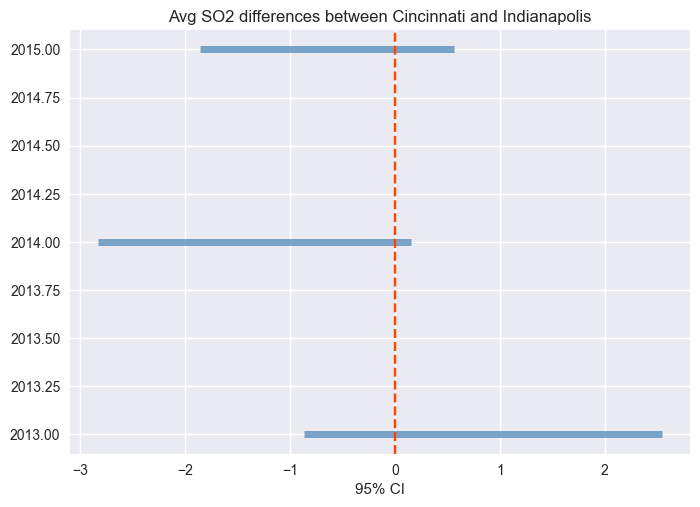

In [186]:
# Set start and ends according to intervals 
# Make lines thicker and transparent
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

# The bootstrap histogram

In [187]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()

NameError: name 'bootstrap' is not defined

# Visualization in the data science workflow

In [229]:
markets = pd.read_csv('markets_cleaned.csv')
markets.head()

FMID                                             name      city  \
0  1018261  Caledonia Farmers Market Association - Danville  Danville   
1  1018318                Stearns Homestead Farmers' Market     Parma   
2  1009364                106 S. Main Street Farmers Market  Six Mile   
3  1010691              10th Steet Community Farmers Market     Lamar   
4  1002454                             112st Madison Avenue  New York   

      county           state        lat        lon  months_open  Bakedgoods  \
0  Caledonia         Vermont -72.140337  44.411036          3.0           1   
1   Cuyahoga            Ohio -81.733939  41.374801          4.0           1   
2        NaN  South Carolina -82.818700  34.804200          NaN           0   
3     Barton        Missouri -94.274619  37.495628          8.0           1   
4   New York        New York -73.949300  40.793900          5.0           1   

   Beans  ...  Plants  Poultry  Prepared  Seafood  Soap  Tofu  Trees  \
0      1  ...       0        1         1        0     1     0      1   
1      0  ...       0        1         0        0     1     0      0   
2      0  ...       0        0         0        0     0     0      0   
3      0  ...       1        1         1        0     1     0      0   
4      0  ...       0        0         1        0     1     0      0   

   Vegetables  WildHarvested  Wine  
0           1              0     0  
1           1              0     0  
2           0              0     0  
3           1              0     0  
4           1              0     0  

[5 rows x 37 columns]

In [230]:
markets['num_items_sold'] = markets.iloc[:, 8:].sum(axis=1)
markets.head()

FMID                                             name      city  \
0  1018261  Caledonia Farmers Market Association - Danville  Danville   
1  1018318                Stearns Homestead Farmers' Market     Parma   
2  1009364                106 S. Main Street Farmers Market  Six Mile   
3  1010691              10th Steet Community Farmers Market     Lamar   
4  1002454                             112st Madison Avenue  New York   

      county           state        lat        lon  months_open  Bakedgoods  \
0  Caledonia         Vermont -72.140337  44.411036          3.0           1   
1   Cuyahoga            Ohio -81.733939  41.374801          4.0           1   
2        NaN  South Carolina -82.818700  34.804200          NaN           0   
3     Barton        Missouri -94.274619  37.495628          8.0           1   
4   New York        New York -73.949300  40.793900          5.0           1   

   Beans  ...  Poultry  Prepared  Seafood  Soap  Tofu  Trees  Vegetables  \
0      1  ...        1         1        0     1     0      1           1   
1      0  ...        1         0        0     1     0      0           1   
2      0  ...        0         0        0     0     0      0           0   
3      0  ...        1         1        0     1     0      0           1   
4      0  ...        0         1        0     1     0      0           1   

   WildHarvested  Wine  num_items_sold  
0              0     0              20  
1              0     0              12  
2              0     0               0  
3              0     0              13  
4              0     0              10  

[5 rows x 38 columns]

In [231]:
census_pop = pd.read_csv('census-state-populations.csv')
census_pop.head()

state  pop_est_2014
0     Alabama       4849377
1      Alaska        736732
2     Arizona       6731484
3    Arkansas       2966369
4  California      38802500

In [232]:
markets = pd.merge(
    markets,
    census_pop,
    how="inner", 
    on="state")
markets.head()

FMID                                             name      city  \
0  1018261  Caledonia Farmers Market Association - Danville  Danville   
1  1018517                             Barre Farmers Market     Barre   
2  1004386                            Bethel Farmers Market    Bethel   
3  1009876                          Bradford Farmers Market  Bradford   
4  1005714                           Brandon Farmers Market   Brandon   

       county    state        lat        lon  months_open  Bakedgoods  Beans  \
0   Caledonia  Vermont -72.140337  44.411036          3.0           1      1   
1  Washington  Vermont -72.497551  44.197006          6.0           1      0   
2     Windsor  Vermont -72.646100  43.844400          NaN           0      0   
3      Orange  Vermont -72.125770  43.998409          6.0           1      0   
4     Rutland  Vermont -73.086312  43.791861          6.0           1      0   

   ...  Prepared  Seafood  Soap  Tofu  Trees  Vegetables  WildHarvested  Wine  \
0  ...         1        0     1     0      1           1              0     0   
1  ...         1        0     0     0      0           1              0     1   
2  ...         0        0     0     0      0           0              0     0   
3  ...         1        0     1     0      0           0              0     0   
4  ...         0        0     1     0      0           1              0     0   

   num_items_sold  pop_est_2014  
0              20        626562  
1              10        626562  
2               0        626562  
3              15        626562  
4              15        626562  

[5 rows x 39 columns]

In [233]:
markets.columns

Index(['FMID', 'name', 'city', 'county', 'state', 'lat', 'lon', 'months_open',
       'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine', 'num_items_sold', 'pop_est_2014'],
      dtype='object')

# Looking at the farmers market data

In [234]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

                                                              0  \
FMID                                                    1018261   
name            Caledonia Farmers Market Association - Danville   
city                                                   Danville   
county                                                Caledonia   
state                                                   Vermont   
lat                                                  -72.140337   
lon                                                   44.411036   
months_open                                                 3.0   
Bakedgoods                                                    1   
Beans                                                         1   
Cheese                                                        1   
Coffee                                                        1   
Crafts                                                        1   
Eggs                                                          

In [235]:
# Get descriptions of every column
col_descriptions = markets.describe(include = 'all',
                                    percentiles = [0.5]).transpose()
print(col_descriptions)

                 count unique                         top freq  \
FMID            8693.0    NaN                         NaN  NaN   
name              8693   8144  Main Street Farmers Market    9   
city              8653   4656                     Chicago   62   
county            8182   1462                 Los Angeles  121   
state             8693     51                  California  760   
lat             8664.0    NaN                         NaN  NaN   
lon             8664.0    NaN                         NaN  NaN   
months_open     5415.0    NaN                         NaN  NaN   
Bakedgoods      8693.0    NaN                         NaN  NaN   
Beans           8693.0    NaN                         NaN  NaN   
Cheese          8693.0    NaN                         NaN  NaN   
Coffee          8693.0    NaN                         NaN  NaN   
Crafts          8693.0    NaN                         NaN  NaN   
Eggs            8693.0    NaN                         NaN  NaN   
Flowers   

# Scatter matrix of numeric columns

In [236]:
markets = markets.rename(columns={'pop_est_2014': 'state_pop'})

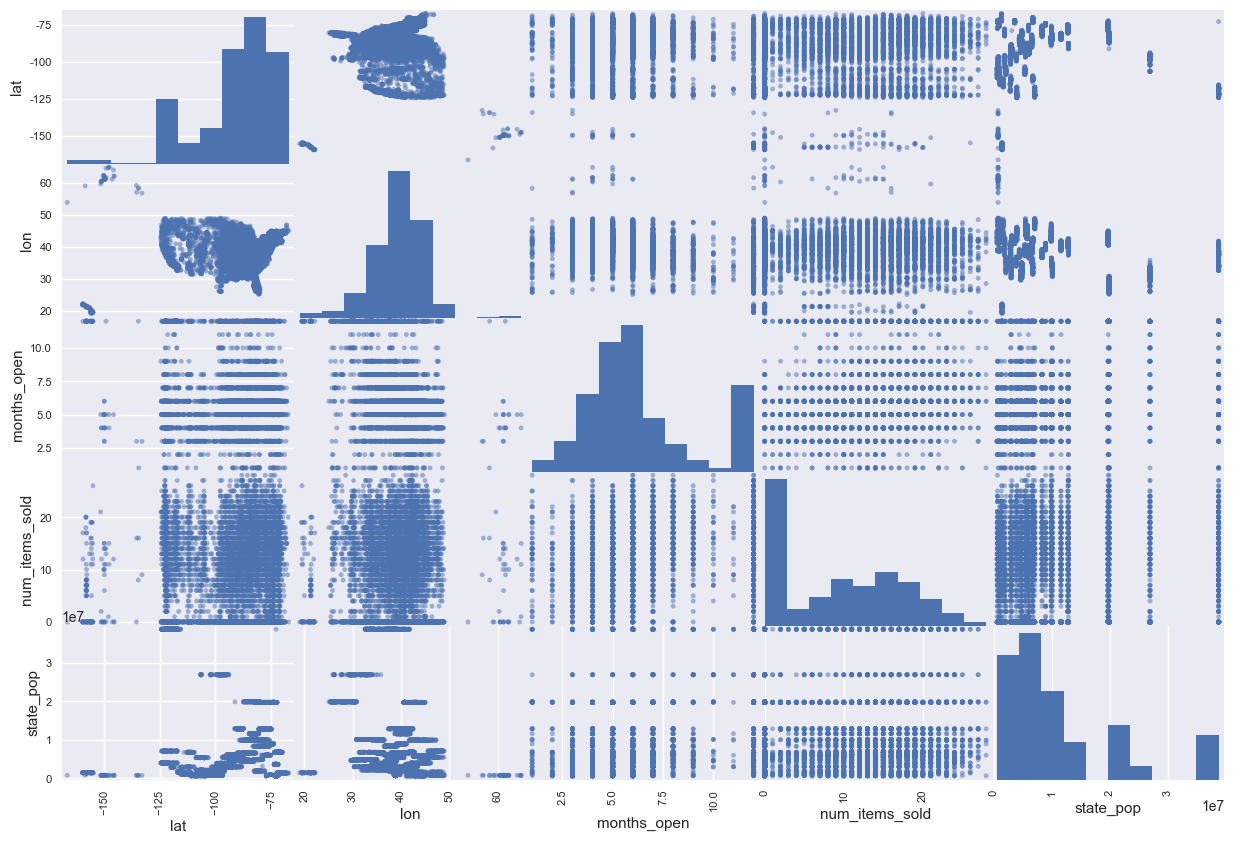

In [237]:
# Select just the numeric columns (exluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                           # Make figure large to show details
                           figsize = [15,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

plt.show()

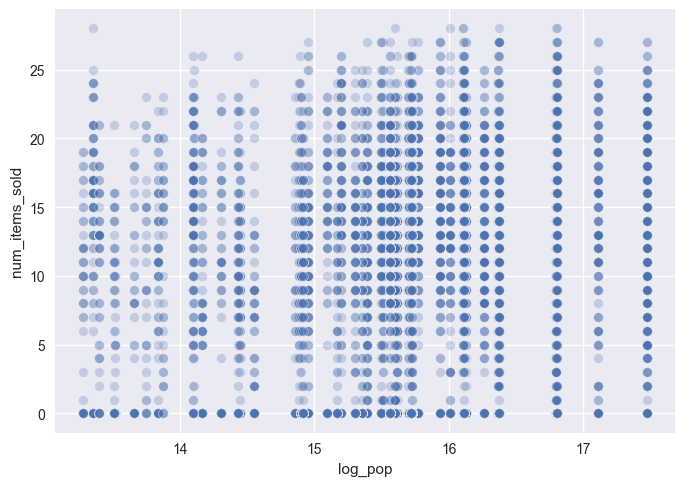

In [238]:
# Create a new logged population column 
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'log_pop', 
                  y = 'num_items_sold', 
                  # Reduce point opacity to show overlap
                  alpha = 0.25, 
                  data = markets)

plt.show()

# Is latitude related to months open?

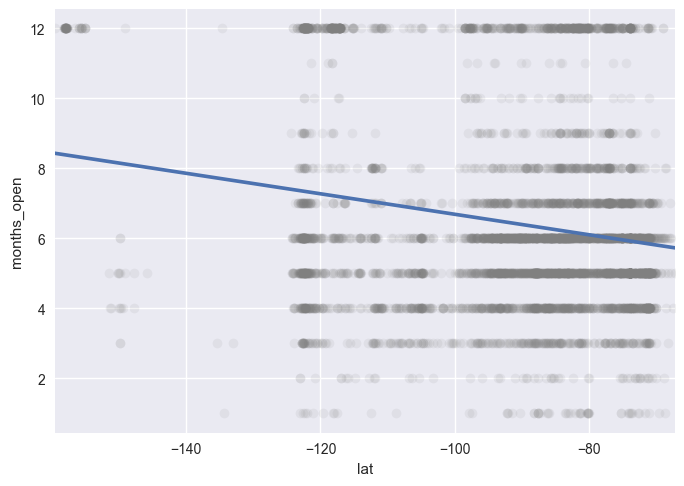

In [239]:
sns.regplot(x = 'lat', 
            y = 'months_open', 
            # Set scatter point opacity & color
            scatter_kws = {'alpha':0.1, 'color':'gray'}, 
            # Disable confidence band
            ci = False, 
            data = markets)

plt.show()

# What state is the most market-friendly?

In [250]:
a = markets.groupby('state').name.nunique()
markets_and_pop = pd.merge(
    a,
    census_pop,
    how="inner", 
    on="state")
markets_and_pop = markets_and_pop.rename(columns={'pop_est_2014': 'state_pop', 'name': 'num_markets'})
markets_and_pop.head()

state  num_markets  state_pop
0     Alabama          139    4849377
1      Alaska           37     736732
2     Arizona           91    6731484
3    Arkansas          107    2966369
4  California          752   38802500

In [253]:
markets_and_pop['log_markets'] = np.log(markets_and_pop['num_markets'])
markets_and_pop['log_pop'] = np.log(markets_and_pop['state_pop'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


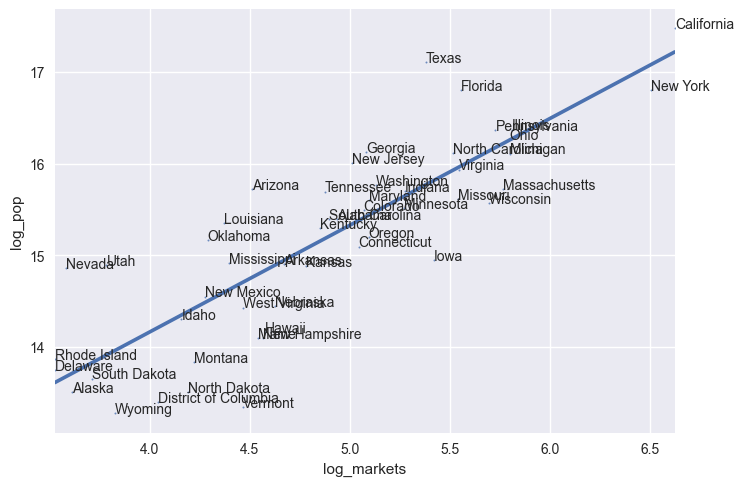

In [254]:
g = sns.regplot(
    "log_markets", "log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, _, _, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets,log_pop), size = 10)

plt.show()

# Efficient plot

## Stacking to find trends

In [256]:
markets = pd.read_csv('markets_cleaned.csv')
markets.head()

FMID                                             name      city  \
0  1018261  Caledonia Farmers Market Association - Danville  Danville   
1  1018318                Stearns Homestead Farmers' Market     Parma   
2  1009364                106 S. Main Street Farmers Market  Six Mile   
3  1010691              10th Steet Community Farmers Market     Lamar   
4  1002454                             112st Madison Avenue  New York   

      county           state        lat        lon  months_open  Bakedgoods  \
0  Caledonia         Vermont -72.140337  44.411036          3.0           1   
1   Cuyahoga            Ohio -81.733939  41.374801          4.0           1   
2        NaN  South Carolina -82.818700  34.804200          NaN           0   
3     Barton        Missouri -94.274619  37.495628          8.0           1   
4   New York        New York -73.949300  40.793900          5.0           1   

   Beans  ...  Plants  Poultry  Prepared  Seafood  Soap  Tofu  Trees  \
0      1  ...       0        1         1        0     1     0      1   
1      0  ...       0        1         0        0     1     0      0   
2      0  ...       0        0         0        0     0     0      0   
3      0  ...       1        1         1        0     1     0      0   
4      0  ...       0        0         1        0     1     0      0   

   Vegetables  WildHarvested  Wine  
0           1              0     0  
1           1              0     0  
2           0              0     0  
3           1              0     0  
4           1              0     0  

[5 rows x 37 columns]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


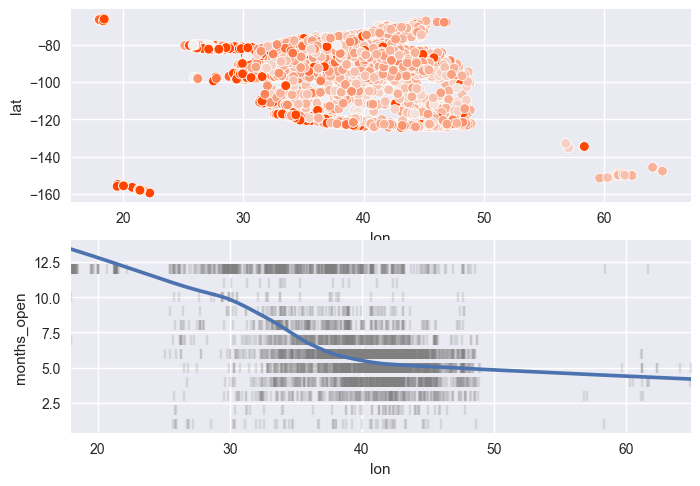

In [259]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1)

# Draw location scatter plot on first plot
sns.scatterplot("lon", "lat", 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

# Plot a regression plot on second plot
sns.regplot('lon', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)
# plt.xlim(-130, -60)
plt.show()

## Using a plot as a legend

In [262]:
markets_and_pop['people_per_market'] = markets_and_pop['state_pop'] / markets_and_pop['num_markets']
markets_and_pop.head()

state  num_markets  state_pop  log_markets    log_pop  \
0     Alabama          139    4849377     4.934474  15.394361   
1      Alaska           37     736732     3.610918  13.509979   
2     Arizona           91    6731484     4.510860  15.722306   
3    Arkansas          107    2966369     4.672829  14.902849   
4  California          752   38802500     6.622736  17.473995   

   people_per_market  
0       34887.604317  
1       19911.675676  
2       73972.351648  
3       27723.074766  
4       51599.069149

In [268]:
state_list = ['Vermont', 'Maryland', 'Texas']

In [272]:
markets_and_pop['is_selected'] = [state if state in state_list else 'other' for state in markets_and_pop.state]
#markets_and_pop

In [273]:
markets_and_pop.head()

state  num_markets  state_pop  log_markets    log_pop  \
0     Alabama          139    4849377     4.934474  15.394361   
1      Alaska           37     736732     3.610918  13.509979   
2     Arizona           91    6731484     4.510860  15.722306   
3    Arkansas          107    2966369     4.672829  14.902849   
4  California          752   38802500     6.622736  17.473995   

   people_per_market is_selected  
0       34887.604317       other  
1       19911.675676       other  
2       73972.351648       other  
3       27723.074766       other  
4       51599.069149       other

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


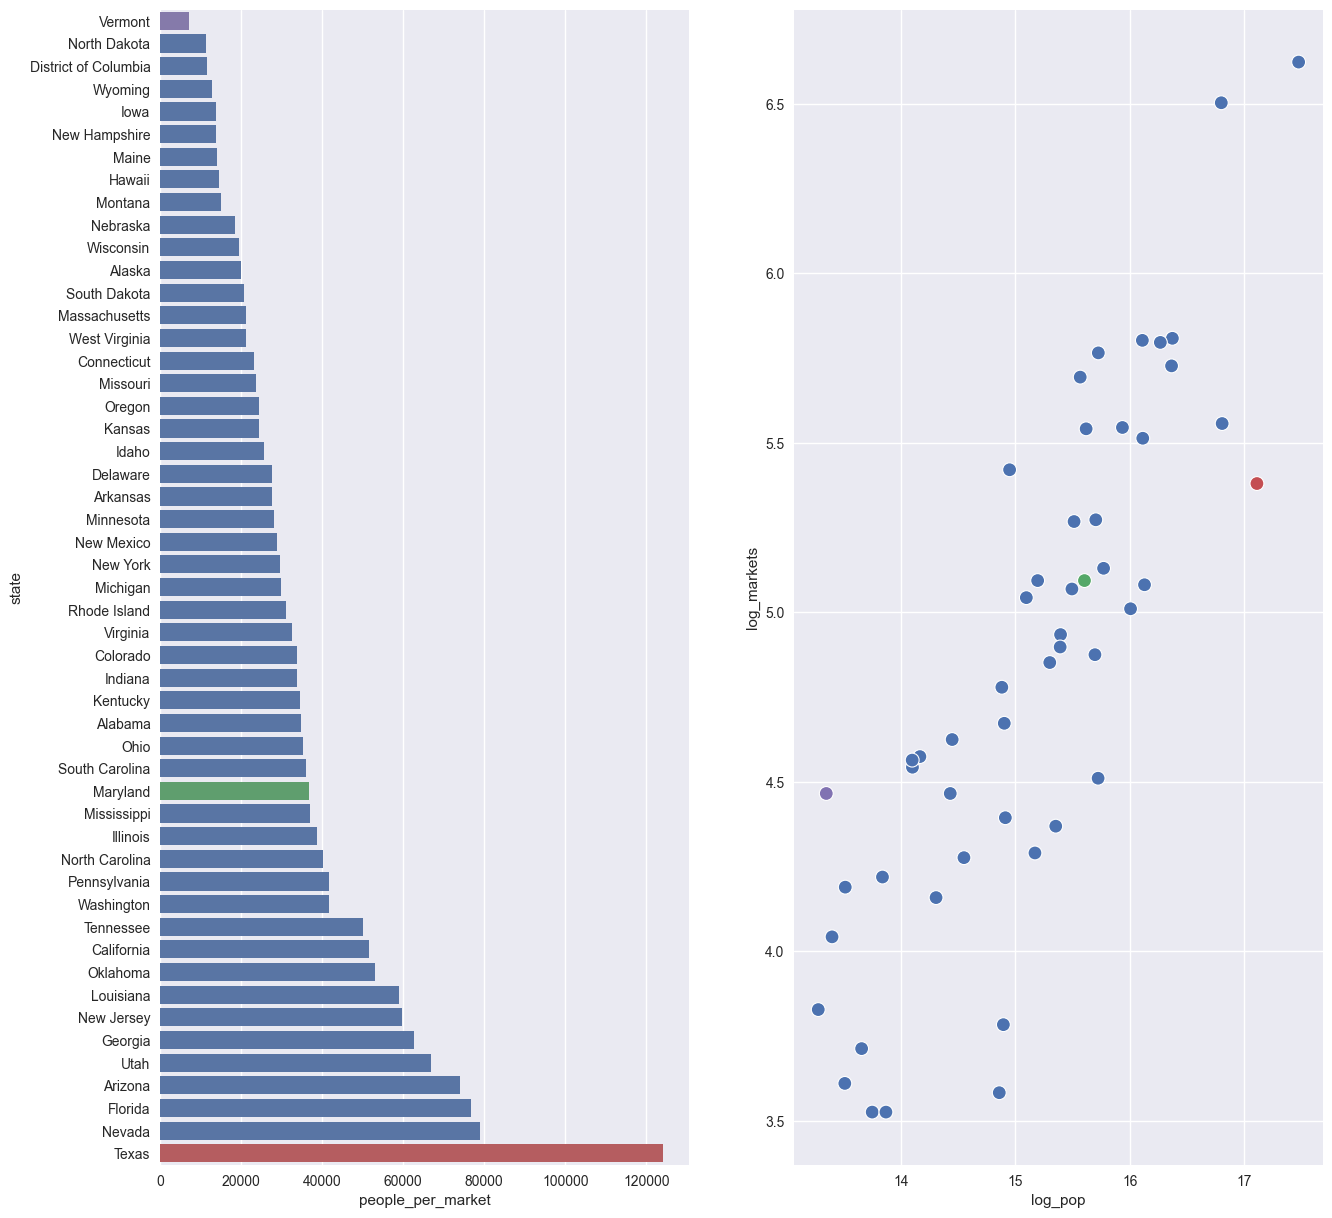

In [279]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

# Map the column for selected states to the bar color
sns.barplot('people_per_market', 'state', hue = 'is_selected',
            # Disable dodge so bars are full size
            dodge = False, 
            data = markets_and_pop, ax = ax1,
           order=markets_and_pop.sort_values('people_per_market',ascending = True).state)

# Map selected states to point color
sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_and_pop, ax = ax2, s = 100)

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove() 
plt.show() 

# Remixing a plot

In [280]:
markets.columns

Index(['FMID', 'name', 'city', 'county', 'state', 'lat', 'lon', 'months_open',
       'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
       'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
       'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
       'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
       'WildHarvested', 'Wine'],
      dtype='object')

In [286]:
markets_by_month = markets.reset_index().pivot_table(values='lat', columns='months_open', index='state')
markets_by_month.head()

months_open        1.0        2.0         3.0         4.0         5.0   \
state                                                                    
Alabama      -87.285562 -86.009696  -86.664244  -86.651321  -86.522714   
Alaska      -134.413603        NaN -141.994130 -149.876808 -149.271347   
Arizona     -112.542181        NaN -112.107009 -111.687336 -111.276521   
Arkansas     -92.318004        NaN         NaN  -92.469031  -91.906859   
California  -119.618889        NaN -121.389938 -121.216552 -121.571062   

months_open        6.0         7.0         8.0         9.0         10.0  \
state                                                                     
Alabama      -86.764909  -86.648261  -87.100277         NaN  -87.655850   
Alaska      -149.870628         NaN         NaN         NaN         NaN   
Arizona     -111.849166 -111.787224 -111.891916 -111.830862         NaN   
Arkansas     -92.385406  -93.195573  -93.523146  -93.308333  -93.153806   
California  -121.031050 -121.283571 -120.340246 -120.888252 -120.219017   

months_open        11.0        12.0  
state                                
Alabama             NaN  -86.481032  
Alaska              NaN -141.848386  
Arizona             NaN -111.171483  
Arkansas     -94.036315  -93.295537  
California  -119.231043 -119.844542

In [289]:
state_by_lat = ['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida']

In [292]:
# # Decrease font size so state names are less crowded
# sns.set(font_scale = 0.85)

# # Switch to an appropriate color palette
# blue_pal = sns.light_palette("steelblue", as_cmap = True)

# # Order states by latitude
# g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
#             # Add gaps between cells
#             linewidths = 0.1, 
#             # Set new palette and remove color bar 
#             cmap = blue_pal, cbar = False,
#             yticklabels = True)

# # Rotate y-axis ticks 
# g.set_yticklabels(g.get_yticklabels(), rotation = 0)
# plt.title('Distribution of months open for farmers markets by latitude')
# plt.show()